In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tqdm import tqdm

In [170]:
simulation_files = os.listdir('simulations')
soft_val_files = [f for f in simulation_files if ('soft' in str(f).lower() and 'val' in str(f).lower())]
soft_test_files = [f for f in simulation_files if 'soft' in str(f).lower() and 'test' in str(f).lower()]
hard_val_files = [f for f in simulation_files if 'hard' in str(f).lower() and 'val' in str(f).lower()]
hard_test_files = [f for f in simulation_files if 'hard' in str(f).lower() and 'test' in str(f).lower()]

In [171]:
# Dataframe with "SEED" column
soft_val = []
soft_test = []
hard_val = []
hard_test = []


for f in soft_val_files:
    df = pd.read_csv('simulations/' + f)
    df['SEED'] = f.split('_')[1]
    soft_val.append(df)

for f in soft_test_files:
    df = pd.read_csv('simulations/' + f)
    df['SEED'] = f.split('_')[1]
    soft_test.append(df)

for f in hard_val_files:
    df = pd.read_csv('simulations/' + f)
    df['SEED'] = f.split('_')[1]
    hard_val.append(df)

for f in hard_test_files:
    df = pd.read_csv('simulations/' + f)
    df['SEED'] = f.split('_')[1]
    hard_test.append(df)

In [172]:
# Merge all dataframes
soft_val = pd.concat(soft_val)
soft_test = pd.concat(soft_test)
hard_val = pd.concat(hard_val)
hard_test = pd.concat(hard_test)

## Metrics

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score, roc_auc_score

In [175]:
metrics_soft_val = pd.DataFrame(columns=['SEED', 'ACCURACY', 'PRECISION', 'RECALL', 'F1', 'BALANCED_ACCURACY', 'ROC_AUC'])
metrics_soft_test = pd.DataFrame(columns=['SEED', 'ACCURACY', 'PRECISION', 'RECALL', 'F1', 'BALANCED_ACCURACY', 'ROC_AUC'])
metrics_hard_val = pd.DataFrame(columns=['SEED', 'ACCURACY', 'PRECISION', 'RECALL', 'F1', 'BALANCED_ACCURACY', 'ROC_AUC'])
metrics_hard_test = pd.DataFrame(columns=['SEED', 'ACCURACY', 'PRECISION', 'RECALL', 'F1', 'BALANCED_ACCURACY', 'ROC_AUC'])

In [180]:
soft_val

,Prediction,True,SEED
0,0.048314,0.0,0
1,0.329459,1.0,0
2,0.167161,0.0,0
3,0.327692,0.0,0
4,0.205210,1.0,0
...,...,...,...
1638,0.080457,0.0,999
1639,0.321737,0.0,999
1640,0.695601,1.0,999
1641,0.172386,0.0,999


In [185]:
soft_val["Prediction"] = soft_val["Prediction"].apply(lambda x: 1 if x > 0.5 else 0)
soft_test["Prediction"] = soft_test["Prediction"].apply(lambda x: 1 if x > 0.5 else 0)

In [186]:
for seed in tqdm(soft_val['SEED'].unique()):
    y_true = soft_val[soft_val['SEED'] == seed]['True']
    y_pred = soft_val[soft_val['SEED'] == seed]['Prediction']
    metrics_soft_val = pd.concat([metrics_soft_val, pd.DataFrame({
        'SEED': seed,
        'ACCURACY': accuracy_score(y_true, y_pred),
        'PRECISION': precision_score(y_true, y_pred),
        'RECALL': recall_score(y_true, y_pred),
        'F1': f1_score(y_true, y_pred),
        'BALANCED_ACCURACY': balanced_accuracy_score(y_true, y_pred),
        'ROC_AUC': roc_auc_score(y_true, y_pred)
    }, index=[0])])

  0%|          | 0/1000 [00:00<?, ?it/s]C:\Users\gabri\AppData\Local\Temp\ipykernel_12932\1256907571.py:4: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics_soft_val = pd.concat([metrics_soft_val, pd.DataFrame({
100%|██████████| 1000/1000 [03:02<00:00,  5.47it/s]


In [ ]:
for seed in tqdm(soft_test['SEED'].unique()):
    y_true = soft_test[soft_test['SEED'] == seed]['True']
    y_pred = soft_test[soft_test['SEED'] == seed]['Prediction']
    metrics_soft_test = pd.concat([metrics_soft_test, pd.DataFrame({
        'SEED': seed,
        'ACCURACY': accuracy_score(y_true, y_pred),
        'PRECISION': precision_score(y_true, y_pred),
        'RECALL': recall_score(y_true, y_pred),
        'F1': f1_score(y_true, y_pred),
        'BALANCED_ACCURACY': balanced_accuracy_score(y_true, y_pred),
        'ROC_AUC': roc_auc_score(y_true, y_pred)
    }, index=[0])])

for seed in tqdm(hard_val['SEED'].unique()):
    y_true = hard_val[hard_val['SEED'] == seed]['True']
    y_pred = hard_val[hard_val['SEED'] == seed]['Prediction']
    metrics_hard_val = pd.concat([metrics_hard_val, pd.DataFrame({
        'SEED': seed,
        'ACCURACY': accuracy_score(y_true, y_pred),
        'PRECISION': precision_score(y_true, y_pred),
        'RECALL': recall_score(y_true, y_pred),
        'F1': f1_score(y_true, y_pred),
        'BALANCED_ACCURACY': balanced_accuracy_score(y_true, y_pred),
        'ROC_AUC': roc_auc_score(y_true, y_pred)
    }, index=[0])])

for seed in tqdm(hard_test['SEED'].unique()):
    y_true = hard_test[hard_test['SEED'] == seed]['True']
    y_pred = hard_test[hard_test['SEED'] == seed]['Prediction']
    metrics_hard_test = pd.concat([metrics_hard_test, pd.DataFrame({
        'SEED': seed,
        'ACCURACY': accuracy_score(y_true, y_pred),
        'PRECISION': precision_score(y_true, y_pred),
        'RECALL': recall_score(y_true, y_pred),
        'F1': f1_score(y_true, y_pred),
        'BALANCED_ACCURACY': balanced_accuracy_score(y_true, y_pred),
        'ROC_AUC': roc_auc_score(y_true, y_pred)
    }, index=[0])])

In [91]:
# Shuffle dataframes
metrics_hard = metrics_hard.sample(frac=1).reset_index(drop=True)
metrics_soft = metrics_soft.sample(frac=1).reset_index(drop=True)

In [142]:
accs_soft = []
accs_hard = []

for i in tqdm(range(10000)):
    metrics_hard = metrics_hard.sample(frac=1).reset_index(drop=True)
    metrics_soft = metrics_soft.sample(frac=1).reset_index(drop=True)   
    acc_soft = metrics_soft["ACCURACY"].expanding().mean()
    acc_hard = metrics_hard["ACCURACY"].expanding().mean()
    accs_soft.append(acc_soft)
    accs_hard.append(acc_hard)

accs_soft = np.array(accs_soft)
accs_hard = np.array(accs_hard)

100%|██████████| 100000/100000 [01:08<00:00, 1453.74it/s]


In [143]:
# mean over the 100 runs 
accs_soft = accs_soft.mean(axis=0)
accs_hard = accs_hard.mean(axis=0)

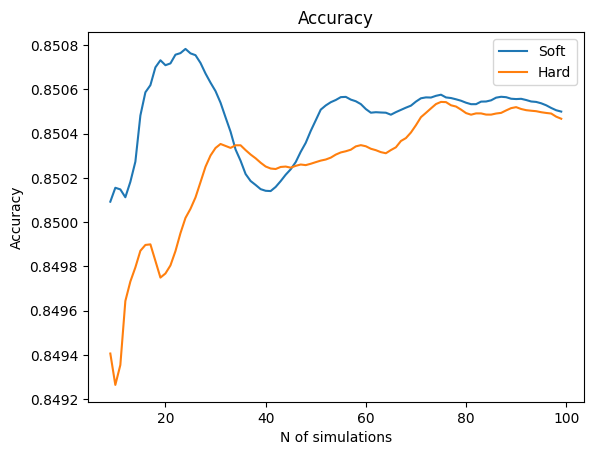

In [149]:
plt.plot(acc_soft.rolling(10).mean(), label='Soft')
plt.plot(acc_hard.rolling(10).mean(), label='Hard')
plt.title('Accuracy')
plt.xlabel('N of simulations')
plt.ylabel('Accuracy')
plt.legend()
plt.show()